## Principal component analysis (PCA)
This notebook is inspired by Matt Brem's <a href = 'https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c'>brilliant article</a> on PCA which is a must-read.<p>
    
He draws attention to the difference between feature selection (picking a subset of features from your feature pool) and principal component analysis which is really a form of feature <i>extraction</i>. <p>
    
I always like to see the theory in action, so the main purpose of this notebook is to:

- look at some examples to illustrate the difference between feature selection and feature extraction, using a simple scenario with the iris dataset taken from the <a href = 'https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html'>sklearn documentation</a> on PCA
- and then to look at a practical application of PCA from the world of NLP (visualizing high-dimensional vectors in 3D space) using <a href = 'https://nlp.stanford.edu/projects/glove/'>GloVe word embeddings</a> <p>
    
Remember, whether we're talking feature selection or feature extraction, <b>our goal is to take a dataset that has <i>many</i> variables and reduce it to a dataset that has <i>fewer</i> variables but remains strongly representative of our data</b>.

### The library part...

In [1]:
# Import our sample dataset, and sklearn.decomposition which includes PCA
from sklearn import datasets
from sklearn import decomposition
# Import additional helper libraries used in the notebook for processing and visualization
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
from  matplotlib import patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

### Looking at feature selection (<i>not</i> PCA)

First of all, let's look at feature <i>selection</i> as discussed in the article. This is a typical task which might be the end-result of exploratory data analysis... You check out the features that make up X, and their correlation to y, and then pick the best.

In [2]:
# Import the iris dataset
iris = datasets.load_iris()
# X = iris.data
# y = iris.target

In [3]:
# Have a look at our variable and target values - 
# we have 4 variables for each item in our dataset
# and there are 3 target y values possible in each case
print('Our features: \n {}'.format(iris.feature_names))
print('Sample data: \n {}'.format(iris.data[0:5]))
print('Target options: \n {}'.format(iris.target_names))
print('Sample targets: \n {}'.format(iris.target[0:5]))

Our features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Sample data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target options: 
 ['setosa' 'versicolor' 'virginica']
Sample targets: 
 [0 0 0 0 0]


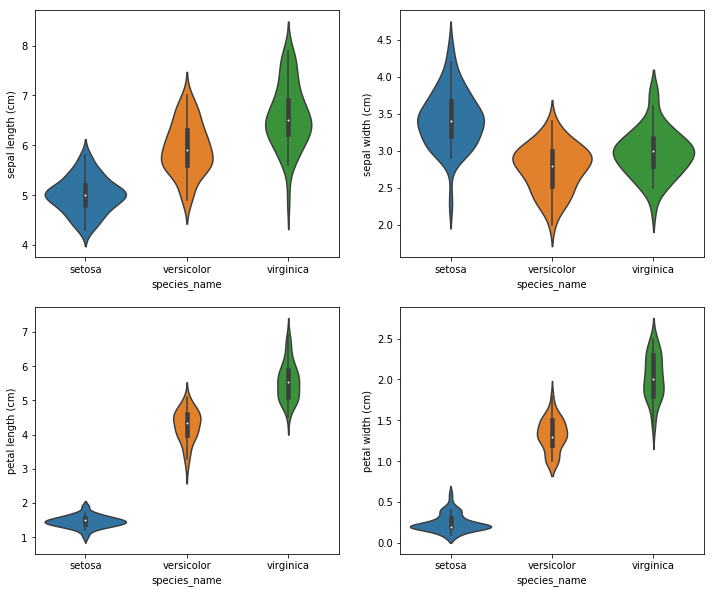

In [4]:
# For convenience let's get all this into a dataframe and then plot - we can see that
# both petal length and width are highly diagnostic compared to sepal length and width
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data['species'] = iris.target
data['species_name'] = data['species'].apply(lambda x: iris.target_names[x])
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x = 'species_name', y = 'sepal length (cm)',data=data)
plt.subplot(2,2,2)
sns.violinplot(x = 'species_name', y = 'sepal width (cm)',data=data)
plt.subplot(2,2,3) 
sns.violinplot(x = 'species_name', y = 'petal length (cm)',data=data)
plt.subplot(2,2,4)
sns.violinplot(x = 'species_name', y = 'petal width (cm)',data=data)
plt.show()

In [5]:
# Look at the correlations between X and y - as expected petal length and width come out tops
for i in range(len(iris.feature_names)):
    corr = np.corrcoef(data[iris.feature_names[i]], data['species'])[0,1]
    print('Correlation between {} and species is {}.'.format(iris.feature_names[i], corr))

Correlation between sepal length (cm) and species is 0.782561231810082.
Correlation between sepal width (cm) and species is -0.4266575607811244.
Correlation between petal length (cm) and species is 0.9490346990083889.
Correlation between petal width (cm) and species is 0.9565473328764034.


In a basic scenario like this we might decide to simply SELECT the 2 highly correlated features and leave out the rest. But sometimes it's not so simple, and then we want to use feature EXTRACTION (aka PCA)...<p>

### Looking at feature extraction (PCA)

So pay particular attention at the outset to <i>this</i> question posed by Matt: '<b>When should I use PCA?</b>
- Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
- Do you want to ensure your variables are independent of one another? [we almost always want to do this in ML, right?!]
- Are you comfortable making your independent variables less interpretable?

If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you should not use PCA.'<p>

In [6]:
# Here's how we take our original 4 variables and find 3 principal components (so few lines of code I hear you say!)
X = iris.data
y = iris.target
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
print(X[0:5])
# Notice how, instead of 4 values for each row in our dataset we now have 3 values

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]]


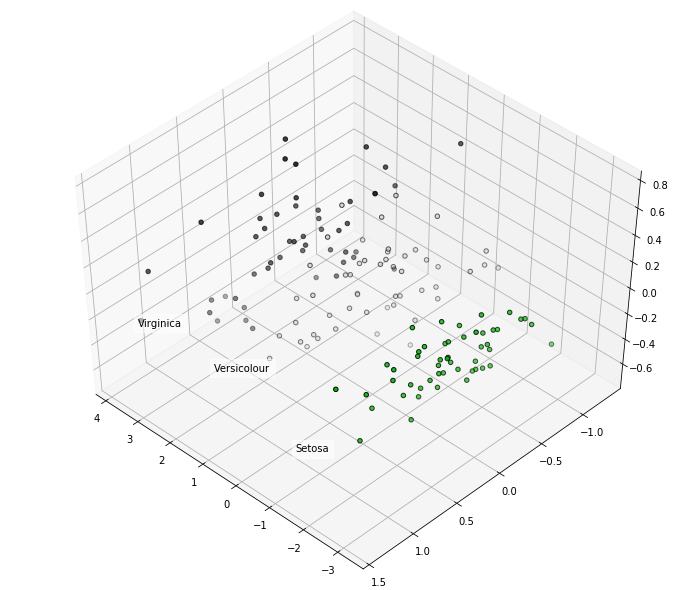

In [7]:
# Because we now have 3 dimensions we can visualize the new representation as follows:
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

plt.show()

Each axis above represents one of our 3 principal components. NOTE that the 3 principal components don't have nice explainable names like 'sepal length' any more!

Now we need to consider the following question from Matt: '<b>How many features to keep versus how many to drop?</b><p>
    
- <u>Method 1</u>: We arbitrarily select how many dimensions we want to keep. Perhaps I want to visually represent things in two dimensions, so I may only keep two features. This is use-case dependent and there isn’t a hard-and-fast rule for how many features I should pick.
- <u>Method 2</u>: Calculate the proportion of variance explained (briefly explained below) for each feature, pick a threshold, and add features until you hit that threshold. (For example, if you want to explain 80% of the total variability possibly explained by your model, add features with the largest explained proportion of variance until your proportion of variance explained hits or exceeds 80%.)
- <u>Method 3</u>: This is closely related to Method 2. Calculate the proportion of variance explained for each feature, sort features by proportion of variance explained and plot the cumulative proportion of variance explained as you keep more features... One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature...(I call this the “find the elbow” method...)'

In [8]:
# Let's have a look at the explained variances for each of our 3 components.
print('Explained variance in numbers: \n {}'.format(pca.explained_variance_))
# Looking at the ratios will usually make everything much clearer
print('Explained variance as %: \n {}'.format(pca.explained_variance_ratio_))

Explained variance in numbers: 
 [4.22824171 0.24267075 0.0782095 ]
Explained variance as %: 
 [0.92461872 0.05306648 0.01710261]


In [9]:
# What this is telling us is 92% of the variance is in fact explained by ONE component!
# We therefore wouldn't lose much by reducing FOUR features to ONE principal component
X = iris.data
y = iris.target
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X = pca.transform(X)
# Notice how, instead of 4 values for each row in our dataset we now have 1 value
print('Sample data: \n {}'.format(X[0:5]))
# Notice how the explained variance ratio for our first principal component hasn't changed...
print('Explained variance as %: \n {}'.format(pca.explained_variance_ratio_))

Sample data: 
 [[-2.68412563]
 [-2.71414169]
 [-2.88899057]
 [-2.74534286]
 [-2.72871654]]
Explained variance as %: 
 [0.92461872]


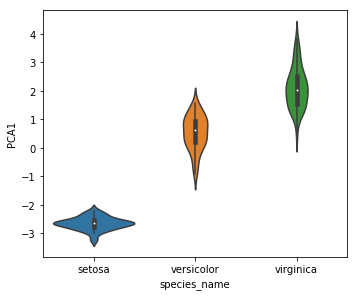

In [10]:
# If we plot these results we can see it is indeed so, and there is a decent separation 
# between the 3 target y values
data = pd.DataFrame(X,columns=['PCA1'])
data['species'] = y
data['species_name'] = data['species'].apply(lambda x: iris.target_names[x])
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x = 'species_name', y = 'PCA1',data=data)

In [11]:
'Correlation between our new component and species is {}.'.format(np.corrcoef(X.flatten(), y)[0,1])

'Correlation between our new component and species is 0.9465402086587769.'

So if our objective was to end up with one component that was highly diagnostic of species, there is not much difference in terms of correlation between picking one feature via feature selection or creating one feature via feature extraction. But as you can imagine, with higher-dimensional datasets PCA becomes a lot more useful! We must also bear in mind that with feature selection we would have picked one highly explainable variable (petal width or petal length) where with feature extraction using PCA, we just have PCA1, which a business person may find less understandable!

### A practical application for NLP
As you may know <a href = 'https://en.wikipedia.org/wiki/Word2vec'>word2vec</a> is a model that learns to represent words in a multi-dimensional vector space, such that words which are closely related will share a similar space and relationships between words will be reflected in this space. One of the most famous examples of this is where the word2vec model learns that the relationship between words like 'king' and 'queen' is similar to the relationship between words like 'man' and 'woman', 'uncle' and 'aunt' and so on.<p>
    
In order to capture the richness of these relationships, the output of a word2vec model will typically be such that each word is represented by a 200- or even 300-long vector (we can essentially think of this as 200 or 300 'features' that represent each word). Us humans are not very good at imagining things in 300 dimensions! So a typical use-case for PCA will be to visualize the word relationships of a word2vec model in 2 or 3 dimensions: in other words to extract just 3 features that are most representative of the 300 features that make up each word.<p>
    
This is a good use case, because we don't lose any sort of <i>explainable meaning</i> in the process: unlike with our iris dataset where each of our 4 vector values represented a specific named feature, the 300 vectors that describe each word are unlabelled.<p>
    
By way of example, I'm going to be working with word embeddings that are just 50 dimensions, as it's a smaller dataset for your to download. To follow along, you can download the GloVe embeddings (glove.6B.50d.txt) e.g. from <a href = 'https://www.kaggle.com/watts2/glove6b50dtxt'>here</a>, or download the full set, if you prefer, from <a href = 'https://nlp.stanford.edu/projects/glove/'>here</a>.

In [12]:
# Define a function to load the Glove model 
# (from https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python)
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [13]:
# Load the model and have a look at a 2 words and how they are represented
# (you'll need to change the folder location to wherever YOU stored the file you downloaded)
glove_model = loadGloveModel('../UniversalDataFiles/glove.6B.50d.txt')
print(glove_model['king'])
print(glove_model['queen'])
# We've been *told* that these words should end up being 'related' - but that is totally not yet apparent!
# This is why we need PCA and visualization :)

Loading Glove Model
Done. 400000  words loaded!
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
[ 0.37854    1.8233    -1.2648    -0.1043     0.35829    0.60029
 -0.17538    0.83767   -0.056798  -0.75795    0.22681    0.98587
  0.60587   -0.31419    0.28877    0.56013   -0.77456    0.071421
 -0.5741     0.21342    0.57674    0.3868    -0.12574    0.28012
  0.28135   -1.8053    -1.0421    -0.19255   -0.55375   -0.054526
  1.5574     0.39296   -0.2475     0.34251    0.45365    0.16237
  0.52464   -0.070272  -0.83744   -1.0326     0.45946    0.25

In [14]:
# Let's get some words of interest that we'd like to explore
words_of_interest = ['man', 'woman', 'uncle', 'aunt', 'lord', 'lady', 'king', 'queen', 
                     'waiter', 'waitress', 'boy', 'girl', 'prince', 'princess']
# And their corresponding vectors
word_vectors = np.zeros(shape = (len(words_of_interest), 50))
for i in range(len(words_of_interest)):
        word_vectors[i] = glove_model[words_of_interest[i]]

In [15]:
# Let's first do PCA with 10 components, just to get a sense of how feasible it will be to then work with only 3...
pca = decomposition.PCA(n_components=10)
pca.fit(word_vectors)
X = pca.transform(word_vectors)
# Notice how, instead of 50 values for each row in our dataset we now have 10 values
print('Sample data: \n {}'.format(X[0:5]))

Sample data: 
 [[-1.47085341 -0.69389053 -1.98616479 -1.15170665 -0.32880502 -0.81625378
   0.09766289 -0.19560091 -0.57521941  0.11885331]
 [-2.25630462 -1.56107223 -0.42318525 -0.73360093 -0.39085399 -0.74979311
  -0.138223    0.90868844  0.21187419  0.01156117]
 [ 0.70381568  1.17796154 -0.60398966 -0.18455697  1.86646964 -0.08476998
  -0.14072189 -0.20816072  0.12358013  0.64473823]
 [-0.2702686   0.26306153  1.66343364  0.82904025  1.7223413  -0.45235804
  -0.37142944  0.58015133 -0.09878226 -0.16212636]
 [ 2.98549187  0.90462453 -2.15999031  1.6320183  -1.10465804 -0.04517586
  -0.98628151  0.22794892  0.08921954  0.04796367]]


Explained variance as %: 
 [0.38237265 0.17822686 0.16042845 0.08762702 0.07132621 0.03445666
 0.02950288 0.01825805 0.01325965 0.00872952]


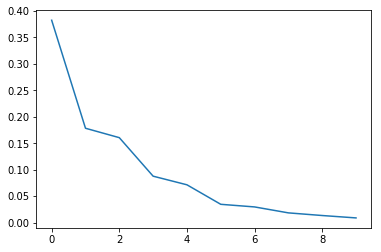

In [16]:
# Let's look at the explained_variance_ratio_s - this is going to show us where that 'elbow' is
print('Explained variance as %: \n {}'.format(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()
# Note that practically we'd get better accuracy by working with around 6 components as that is where
# our elbow starts to level off - but our use case is to visualize the data in 3D so we need to 
# evaluate whether 3 components will be 'good enough' for purposes of visualization...

In [17]:
# How much of the variance is explained by the first 3 features?
sum(pca.explained_variance_ratio_[0:3])
# It's pretty good - note that this varies very much with the words that you
# choose to include: try it with a different word list and you'll see what I mean

0.7210279579076474

In [18]:
# Let's give it a go
pca = decomposition.PCA(n_components=3)
pca.fit(word_vectors)
X = pca.transform(word_vectors)
print(X[0:5])

[[-1.47085341 -0.69389053 -1.98616479]
 [-2.25630462 -1.56107223 -0.42318525]
 [ 0.70381568  1.17796154 -0.60398966]
 [-0.2702686   0.26306153  1.66343364]
 [ 2.98549187  0.90462453 -2.15999031]]


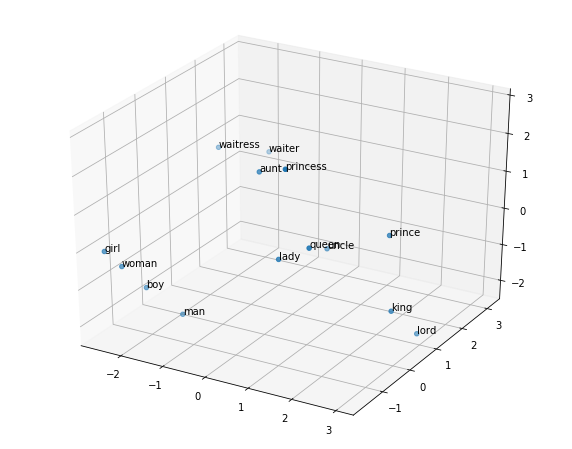

In [19]:
# And now we can put it into a dataframe for convenience and plot the results, 
# with each of our 3 (nameless) components represented by one of our 3 axes
result=pd.DataFrame(X)
result['label'] = words_of_interest
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result[0], result[1], result[2])
for word, x, y, z in zip(words_of_interest, result[0], result[1], result[2]):   
    ax.text(x, y, z, word)

Notice that it DOES actually make sense. For every male word, the corresponding female word lies in a similar direction (to the left and up in most cases) - locate <b>man</b> vs <b>woman</b>, for example. <p>
    
So using PCA, we've been able to visualize the relationships between words originally represented in 50 dimensions by reducing the number of dimensions to 3 - and without significant loss of meaning (in this case we agreed that around 70% was okay for visualization!)